In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm, DivergingNorm
import matplotlib.colors as colors
plt.rcParams['figure.max_open_warning'] = 500
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
from scipy.optimize import curve_fit
from scipy.interpolate import interp2d, interp1d
from os import path
import colorcet as cc   # install quickly with "conda install colorcet"
from scipy.interpolate import RectBivariateSpline
from matplotlib import ticker
from scipy.ndimage import gaussian_filter
import matplotlib as mpl
from lmfit import Model
import glob
from scipy.special import digamma

In [3]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['lines.markersize'] = 4
%config InlineBackend.figure_format = 'svg'

font = {
                'family': 'Arial',
                'size': 12,
                'serif': 'Times',
                'sans-serif': 'Arial'
            }

plt.rc('font', **font)

In [4]:
cd ..

/Users/robertpolski/Documents/NPGroupResearch/Measurements/Triton/qcodes_data


In [5]:
qc.DataSet.default_io.base_location = path.abspath('.')

In [6]:
figfile = 'Figures/W3_WALpeaks/'

In [7]:
esqh = 1.602e-19**2/6.626e-34

# Extracting the data

## Vbg -1.24 to -1.74

In [141]:
files1 = sorted(glob.glob('data/2020-04-11/#*/'))[26:52]
vbg1 = np.linspace(-1.24, -1.74, 26)
barr = np.linspace(-25, 25, 501)

In [142]:
walarr1_865 = np.zeros((len(vbg1), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files1):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin865_X[:dlast]/10e-9)
    walarr1_865[i, :] = sweep

In [143]:
b0 = -1.2  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
dG1_865 = np.zeros(walarr1.shape)
for i in range(len(vbg1)):
    dG1_865[i, :] = 1/walarr1_865[i, :]/esqh - 1/walarr1_865[i, pind]/esqh

-1.20 is not a value in the array
Plotted -1.20 instead


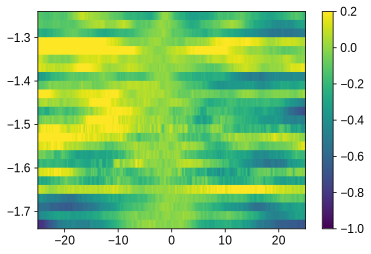

In [144]:
plt.figure()
plt.pcolormesh(barr, vbg1, dG1_865, vmin=-1, vmax=0.2, rasterized=True)
plt.colorbar()

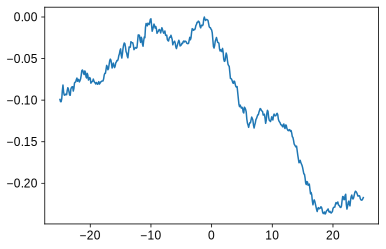

In [145]:
plt.figure()
plt.plot(barr, np.average(dG1_865, axis=0))

In [146]:
walarr1_830 = np.zeros((len(vbg1), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files1):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin830_X[:dlast]/10e-9)
    walarr1_830[i, :] = sweep

In [147]:
b0 = -1.2  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
dG1_830 = np.zeros(walarr1.shape)
for i in range(len(vbg1)):
    dG1_830[i, :] = 1/walarr1_830[i, :]/esqh - 1/walarr1_830[i, pind]/esqh

-1.20 is not a value in the array
Plotted -1.20 instead


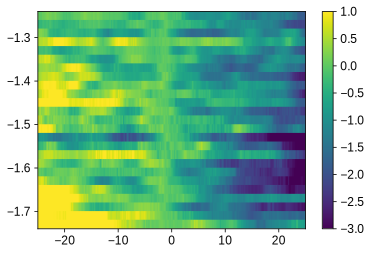

In [148]:
plt.figure()
plt.pcolormesh(barr, vbg1, dG1_830, vmin=-3, vmax=1, rasterized=True)
plt.colorbar()

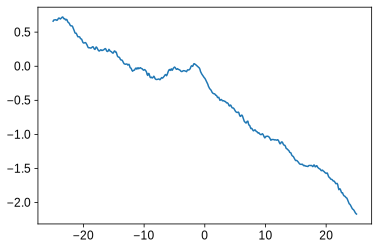

In [149]:
plt.figure()
plt.plot(barr, np.average(dG1_830, axis=0))

## Vbg -0.25 to -0.77

In [150]:
files2 = sorted(glob.glob('data/2020-04-11/#0*/'))[55:83]
len(files2)

28

In [151]:
del files2[9]

In [152]:
vbg2 = np.linspace(-0.25, -0.77, 27)
barr = np.linspace(-25, 25, 501)

In [153]:
walarr2_865 = np.zeros((len(vbg2), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files2):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin865_X[:dlast]/10e-9)
    walarr2_865[i, :] = sweep

In [154]:
b0 = -1.3  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
barrcorr = barr - b0
dG2_865 = np.zeros(walarr2_865.shape)
for i in range(len(vbg2)):
    dG2_865[i, :] = 1/walarr2_865[i, :]/esqh - 1/walarr2_865[i, pind]/esqh

-1.30 is not a value in the array
Plotted -1.30 instead


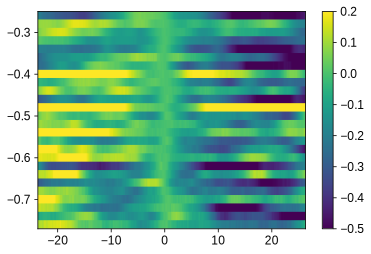

In [155]:
plt.figure()
plt.pcolormesh(barrcorr, vbg2, dG2_865, vmin=-0.5, vmax=0.2, rasterized=True)
plt.colorbar()

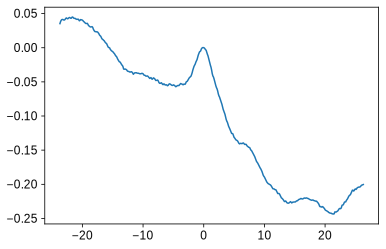

In [156]:
plt.figure()
plt.plot(barrcorr, np.average(dG2_865, axis=0))
# plt.axis((-2, 0.5, -0.01, 0.01))


In [157]:
walarr2_830 = np.zeros((len(vbg2), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files2):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin830_X[:dlast]/10e-9)
    walarr2_830[i, :] = sweep

In [158]:
b0 = -1.2  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
dG2_830 = np.zeros(walarr2_830.shape)
for i in range(len(vbg2)):
    dG2_830[i, :] = 1/walarr2_830[i, :]/esqh - 1/walarr2_830[i, pind]/esqh

-1.20 is not a value in the array
Plotted -1.20 instead


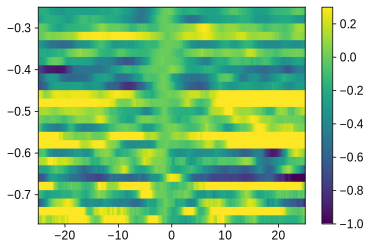

In [159]:
plt.figure()
plt.pcolormesh(barr, vbg2, dG2_830, vmin=-1, vmax=0.3, rasterized=True)
plt.colorbar()

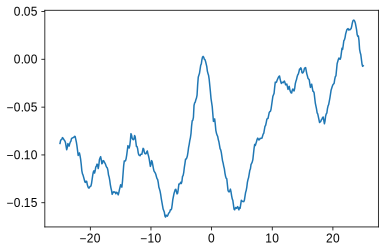

In [222]:
plt.figure()
plt.plot(barr, np.average(dG2_830[:22], axis=0))

In [223]:
vbg2[22]

-0.69

## Vbg 1.0 to 4.98V

In [161]:
files3_1 = sorted(glob.glob('data/2020-04-11/#*/'))[86:]
print(len(files3_1))
files3_2 = sorted(glob.glob('data/2020-04-12/#*/'))
print(len(files3_2))
files3_3 = sorted(glob.glob('data/2020-04-13/#*/'))[:-6]
print(len(files3_3))
files3 = files3_1 + files3_2 + files3_3
print(len(files3))

8
128
64
200


In [162]:
vbg3 = np.linspace(1.00, 4.98, 200)
barr = np.linspace(-25, 25, 501)

In [163]:
walarr3_865 = np.zeros((len(vbg3), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files3):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin865_X[:dlast]/10e-9)
    walarr3_865[i, :] = sweep

In [165]:
b0 = -1.3  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
barrcorr = barr - b0
dG3_865 = np.zeros(walarr3_865.shape)
for i in range(len(vbg3)):
    dG3_865[i, :] = 1/walarr3_865[i, :]/esqh - 1/walarr3_865[i, pind]/esqh

-1.30 is not a value in the array
Plotted -1.30 instead


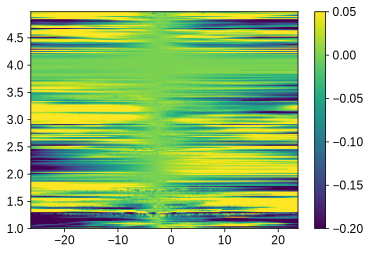

In [181]:
plt.figure()
plt.pcolormesh(barr-1.3, vbg3, dG3_865, vmin=-0.2, vmax=0.05, rasterized=True)
plt.colorbar()

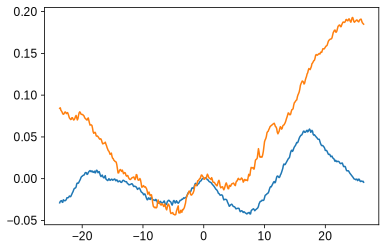

In [214]:
plt.figure()  # only a few select ranges have the peak.
plt.plot(barr + 1.3, np.average(dG3_865[90:95, :], axis=0))
plt.plot(barr + 1.3, np.average(dG3_865[15:28, :], axis=0))

In [217]:
print(vbg3[90], vbg3[95], vbg3[15], vbg3[28])

2.8 2.9000000000000004 1.3 1.56


In [224]:
walarr3_830 = np.zeros((len(vbg3), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files3):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin830_X[:dlast]/10e-9)
    walarr3_830[i, :] = sweep

In [225]:
b0 = -1.3  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
barrcorr = barr - b0
dG3_830 = np.zeros(walarr3_830.shape)
for i in range(len(vbg3)):
    dG3_830[i, :] = 1/walarr3_830[i, :]/esqh - 1/walarr3_830[i, pind]/esqh

-1.30 is not a value in the array
Plotted -1.30 instead


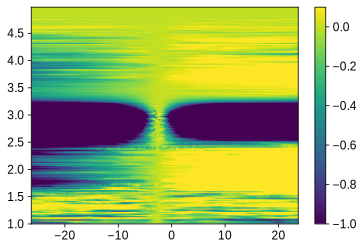

In [228]:
plt.figure()
plt.pcolormesh(barr-1.3, vbg3, dG3_830, vmin=-1, vmax=0.1, rasterized=True)
plt.colorbar()

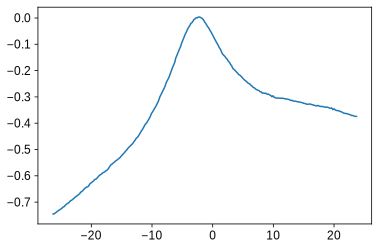

In [245]:
plt.figure()
plt.plot(barr-1.3, np.average(dG3_830[110:120, :], axis=0))

In [242]:
print(vbg3[100], vbg3[120])

3.0 3.4


## hole dispersive bands (-8.58 to -9.08 Vbg)

In [250]:
files4 = sorted(glob.glob('data/2020-04-11/#*/'))[:26]
len(files4)

26

In [253]:
vbg4 = np.linspace(-8.58, -9.08, 26)
barr = np.linspace(-25, 25, 501)

In [255]:
walarr4_865 = np.zeros((len(vbg4), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files4):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin865_X[:dlast]/10e-9)
    walarr4_865[i, :] = sweep

In [256]:
b0 = -1.3  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
barrcorr = barr - b0
dG4_865 = np.zeros(walarr4_865.shape)
for i in range(len(vbg4)):
    dG4_865[i, :] = 1/walarr4_865[i, :]/esqh - 1/walarr4_865[i, pind]/esqh

-1.30 is not a value in the array
Plotted -1.30 instead


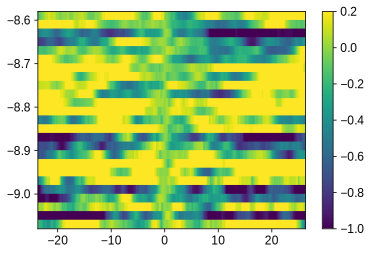

In [259]:
plt.figure()
plt.pcolormesh(barrcorr, vbg4, dG4_865, vmin=-1, vmax=0.2, rasterized=True)
plt.colorbar()

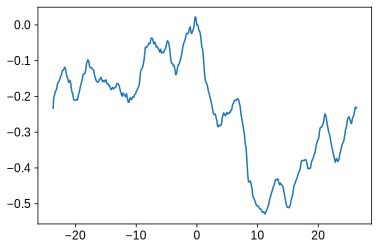

In [290]:
plt.figure()
plt.plot(barrcorr, np.average(dG4_865[:5, :], axis=0))
# plt.axis((-2, 0.5, -0.01, 0.01))

In [271]:
walarr4_830 = np.zeros((len(vbg4), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files4):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin830_X[:dlast]/10e-9)
    walarr4_830[i, :] = sweep

In [272]:
b0 = -1.2  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
dG4_830 = np.zeros(walarr4_830.shape)
for i in range(len(vbg4)):
    dG4_830[i, :] = 1/walarr4_830[i, :]/esqh - 1/walarr4_830[i, pind]/esqh

-1.20 is not a value in the array
Plotted -1.20 instead


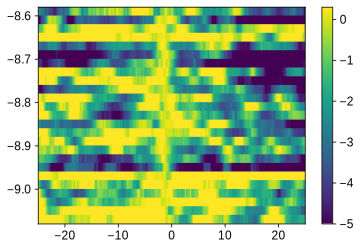

In [275]:
plt.figure()
plt.pcolormesh(barr, vbg4, dG4_830, vmin=-5, vmax=0.3, rasterized=True)
plt.colorbar()

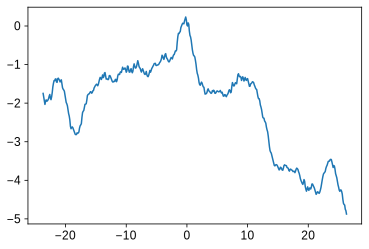

In [285]:
plt.figure()
plt.plot(barrcorr, np.average(dG4_830[:10, :], axis=0))

In [282]:
vbg4[10]

-8.78

## Electron dispersive bands (9.1 to 9.6 Vbg)

In [299]:
files5 = sorted(glob.glob('data/2020-04-21/#*/'))[7:33]
len(files5)

26

In [300]:
vbg5 = np.linspace(9.1, 9.6, 26)
barr = np.linspace(-25, 25, 501)

In [301]:
walarr5_865 = np.zeros((len(vbg5), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files5):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin865_X[:dlast]/10e-9)
    walarr5_865[i, :] = sweep

In [302]:
b0 = -1.3  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
barrcorr = barr - b0
dG5_865 = np.zeros(walarr5_865.shape)
for i in range(len(vbg5)):
    dG5_865[i, :] = 1/walarr5_865[i, :]/esqh - 1/walarr5_865[i, pind]/esqh

-1.30 is not a value in the array
Plotted -1.30 instead


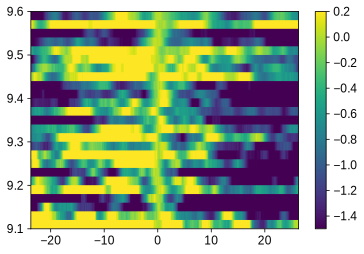

In [304]:
plt.figure()
plt.pcolormesh(barrcorr, vbg5, dG5_865, vmin=-1.5, vmax=0.2, rasterized=True)
plt.colorbar()

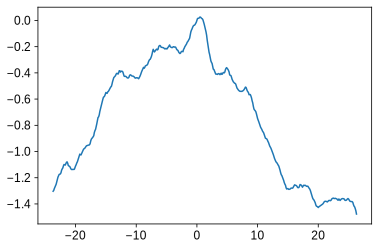

In [313]:
plt.figure()
plt.plot(barrcorr, np.average(dG5_865[12:25, :], axis=0))
# plt.axis((-2, 0.5, -0.01, 0.01))

In [314]:
walarr5_830 = np.zeros((len(vbg5), len(barr)))

#raw Resistance data placed into an array
for i, f in enumerate(files5):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barr/1000, d.triton_field[:dlast], d.lockin830_X[:dlast]/10e-9)
    walarr5_830[i, :] = sweep

In [315]:
b0 = -1.2  # the offset of the field zero point
pind = npd.val_to_index([b0], barr)[0]
dG5_830 = np.zeros(walarr5_830.shape)
for i in range(len(vbg5)):
    dG5_830[i, :] = 1/walarr5_830[i, :]/esqh - 1/walarr5_830[i, pind]/esqh

-1.20 is not a value in the array
Plotted -1.20 instead


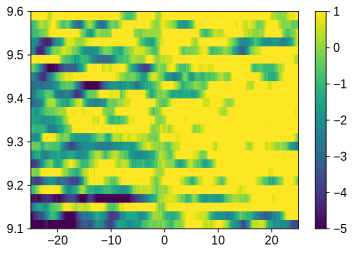

In [319]:
plt.figure()
plt.pcolormesh(barr, vbg5, dG5_830, vmin=-5, vmax=1, rasterized=True)
plt.colorbar()

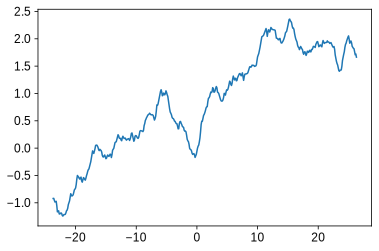

In [326]:
plt.figure()
plt.plot(barrcorr, np.average(dG5_830[10:, :], axis=0))

# M26 WAL

In [28]:
filesM26_1 = sorted(glob.glob('data/2020-04-28/#*/'))[163:] + sorted(glob.glob('data/2020-04-29/#*/'))[:72]
len(filesM26_1)

106

In [33]:
vbgm261 = np.linspace(1, 11.5, 106)
barrm26 = np.linspace(-20, 20, 401)

In [35]:
walarrm261 = np.zeros((len(vbgm261), len(barrm26)))

#raw Resistance data placed into an array
for i, f in enumerate(filesM26_1):
    d = qc.load_data(f[:-1])
    dlast = np.where(np.isnan(d.triton_field))[0][0]
    sweep = np.interp(barrm26/1000, d.triton_field[:dlast], d.lockin865_X[:dlast]/10e-9)
    walarrm261[i, :] = sweep

In [40]:
b0 = -1.1  # the offset of the field zero point
pind = npd.val_to_index([b0], barrm26)[0]
barrm26corr = barrm26 - b0
dGm261 = np.zeros(walarrm261.shape)
for i in range(len(vbgm261)):
    dGm261[i, :] = 1/walarrm261[i, :]/esqh - 1/walarrm261[i, pind]/esqh

-1.10 is not a value in the array
Plotted -1.10 instead


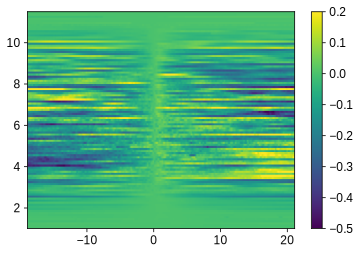

In [49]:
plt.figure()
plt.pcolormesh(barrm26corr, vbgm261, dGm261, vmin=-0.5, vmax=0.2, rasterized=True)
plt.colorbar()

In [46]:
vbgm261[90]

10.0

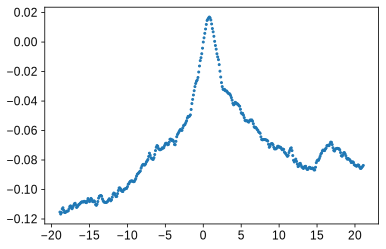

In [53]:
plt.figure()
plt.plot(barrm26corr, np.average(dGm261[20:90], axis=0), '.')
# plt.plot(barrm26corr, np.average(dGm261[20:40], axis=0), '.')
# plt.plot(barrm26corr, np.average(dGm261[70:90], axis=0), '.')